## Binh and Korn function 

Problem taken from \[Binh T. and Korn U. (1997) MOBES: A Multiobjective Evolution Strategy for Constrained Optimization Problems. In: Proceedings of the Third International Conference on Genetic Algorithms. Czech Republic. pp. 176–182\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 4x_1^2+4x_2^2$

$f_2 (x_1,x_2) = (x_1 - 5)^2+(x_2-5)^2$

*subjected to*

$(x_1 - 5)^2+x_2^2 \le 25$

$(x_1 - 8)^2+(x_2+3)^2 \ge 7.7$

*in the domain*

$0 \le x_1 \le 5$

$0 \le x_2 \le 3$

In [1]:
import mosa
from math import inf
from numpy.random import seed

%matplotlib inline

In [2]:
print(f"MOSA version: {mosa.__version__}")

MOSA version: 0.7.0


In [3]:
seed(0)

### Translates the Binh and Korn problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the objective functions to be minimized. 

The solution to the problem is given by $X_1$ and $X_2$. 

The constraints are defined as $c_1$ and $c_2$. If they are not fulfilled, infinity is assigned to $f_1$ and $f_2$.

In [4]:
def fobj(X1: float, X2: float) -> tuple:
    f1 = 4.0 * (pow(X1, 2) + pow(X2, 2))
    f2 = pow((X1 - 5), 2) + pow((X2 - 5), 2)

    c1 = pow((X1 - 5), 2) + pow((X2), 2)
    c2 = pow((X1 - 8), 2) + pow((X2 + 3), 2)

    if c1 > 25.0 or c2 < 7.7:
        f1 = inf
        f2 = inf

    return f1, f2

### Initialization

In [5]:
opt = mosa.Anneal()

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
       Developed by Prof. Roberto Gomes, PhD      
   Universidade Federal do ABC (UFABC), Brazil
    


In [6]:
opt.set_population(X1=(0.0, 5.0), X2=(0.0, 3.0))

In [7]:
opt.archive_size = 10000
opt.maximum_archive_rejections = 10000

### Hot run

A first run starting at very high temperature (1000.0) is performed. This initial "hot run" helps the algorithm not to be trapped.

In [8]:
opt.initial_temperature = 1000.0
opt.number_of_iterations = 1000
opt.number_of_temperatures = 100
opt.temperature_decrease_factor = 0.95

In [9]:
opt.set_opt_param("number_of_elements", X1=1, X2=1)
opt.set_opt_param("mc_step_size", X1=0.5, X2=0.3)

In [10]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------

Items in the solution:

    X1:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,5.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.5
    X2:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,3.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.3
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 1000.000000
Evolving solutions to the problem, please wait...
Maximum number of temperatures reached!
Stopping at temperature:  6.232136.
------

--- THE END ---
C

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front.

In [11]:
opt.initial_temperature = 1.0

In [12]:
opt.set_opt_param("mc_step_size", X1=0.05, X2=0.03)

In [13]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------

Items in the solution:

    X1:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,5.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.05
    X2:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,3.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.03
------
Initial solution loaded from the checkpoint file...
Done!
------
Starting at temperature: 1.000000
Evolving solutions to the problem, please wait...
Too many attempts to insert a solution in the archive failed!
Stopping at temperature: 0.012140
------

--- THE END ---
CPU times: total: 3min 21s
Wall time: 3min 27s


### Output

In [14]:
%%time
pruned = opt.prune_dominated()

CPU times: total: 40.4 s
Wall time: 41.3 s


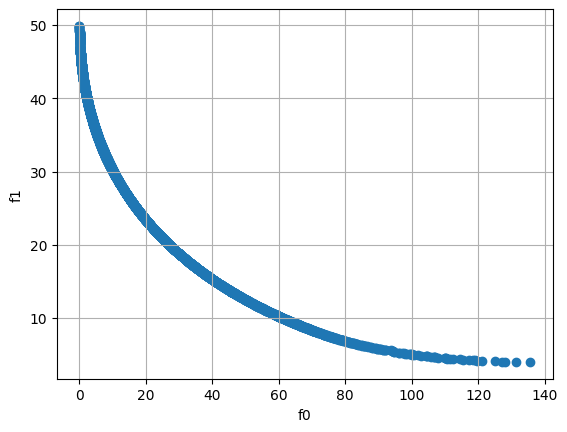

In [15]:
opt.plot_front(pruned)